In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=["Normal","Fraud"]

In [2]:
dftrain = pd.read_csv("D:/Python/Financial/train_data.csv")

In [ ]:
dftrain.head(10)

In [3]:
#Finding the Information about the training dataset
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [3]:
#Shape of the training dataset
dftrain.shape

(227845, 31)

In [ ]:
#Finding the Null Values of the training dataset
dftrain.isnull().values.any()

In [3]:
dftest = pd.read_csv("D:/Python/Financial/test_data.csv")

In [7]:
#Finding the Information about the testing dataset
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22

In [ ]:
dftest.head()

In [8]:
#Shape of the training dataset
dftest.shape

(56962, 30)

In [ ]:
dftest.isnull().values.any()

In [ ]:
dftesthidden = pd.read_csv("D:/Python/Financial/test_data_hidden.csv")

In [ ]:
dftesthidden.head(10)

In [ ]:
dftesthidden.info()

Text(0, 0.5, 'Frequency')

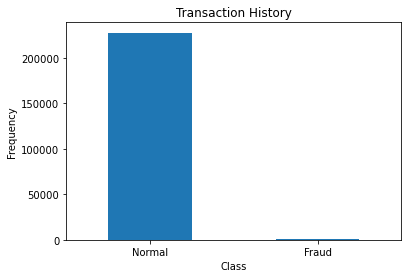

In [9]:
count_classes = pd.value_counts(dftrain['Class'],sort=True)
#Plot a bar chart
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction History')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

### Conclusion
1. There are more than 25000 Normal transactions compared to less number of fraud transactions
2. It is an imbalanced dataset.

In [10]:
#Get the fraud and the normal dataset transactions
fraud = dftrain[dftrain['Class']==1]
normal = dftrain[dftrain['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(394, 31) (227451, 31)


In [12]:
#Analyze more information from the transaction data for any trends or patterns
#How different are the amount of money used in different transaction classes
fraud.Amount.describe()

count     394.000000
mean      127.306523
std       264.533907
min         0.000000
25%         1.000000
50%        11.395000
75%       106.385000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
normal.Amount.describe()

count    227451.000000
mean         88.455144
std         248.066088
min           0.000000
25%           5.640000
50%          22.000000
75%          77.000000
max       19656.530000
Name: Amount, dtype: float64

In [4]:
#Take Sample of data for preprocessing
data1=dftrain.sample(frac=0.1,random_state=1)
data1.shape

(22784, 31)

In [5]:
#Find out the number of fraud and valid transactions in the dataset
Fraud = data1[data1['Class']==1]
Normal = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Normal))

In [16]:
#Outlier is 0.20% are fraud transactions out of normal transactions
print(outlier_fraction)
print("Fraud Cases:{}".format(len(Fraud)))
print("Normal Cases:{}".format(len(Normal)))

0.0020671152746624443
Fraud Cases:47
Normal Cases:22737


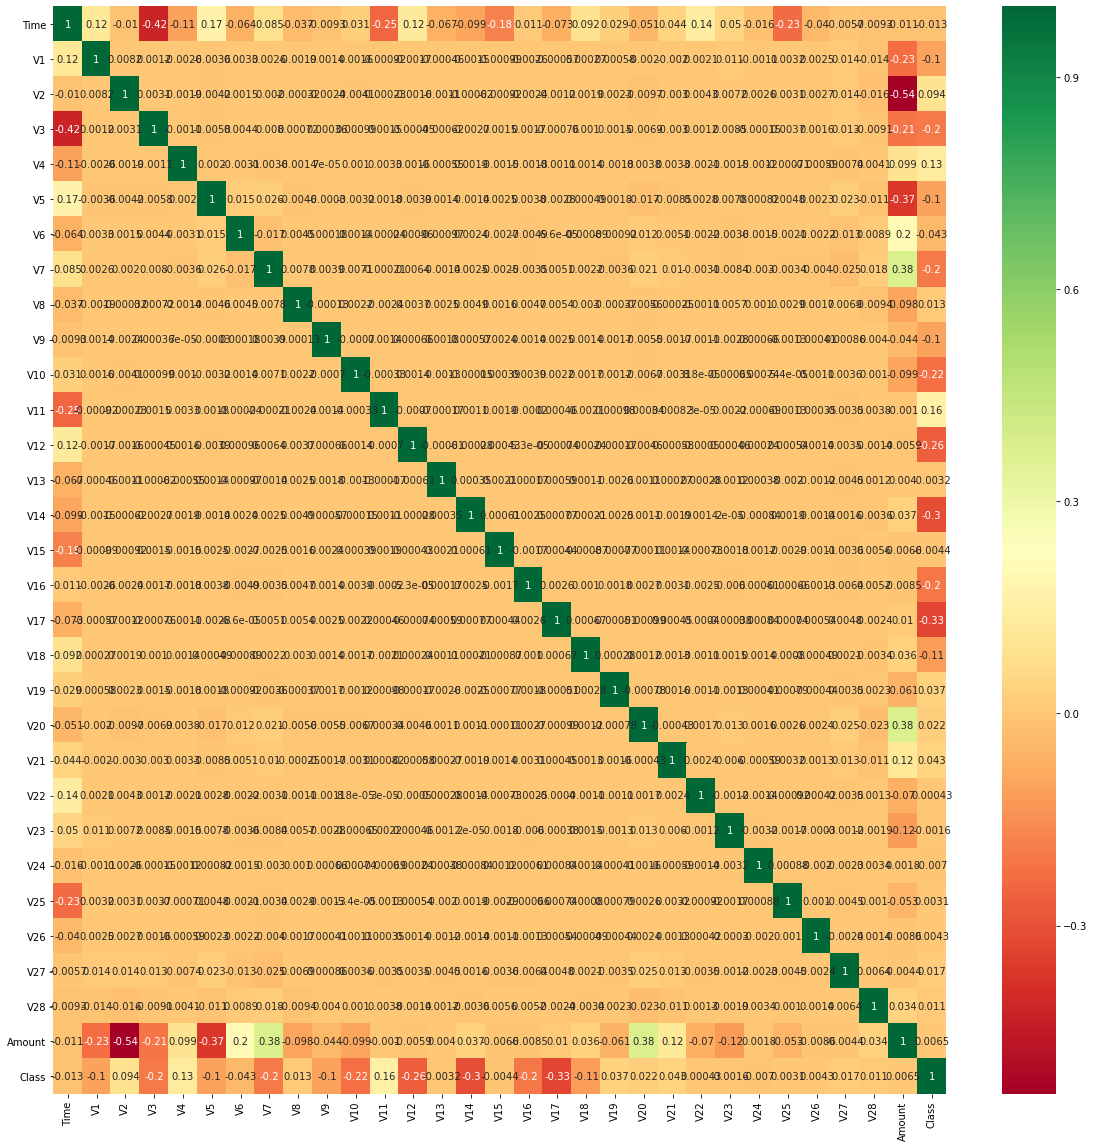

In [17]:
#Correlation
import seaborn as sns
#Get Correlation features as dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dftrain[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
#Undersampling

fraud_records = len(dftrain[dftrain.Class == 1])
#Get the index
fraud_indices = dftrain[dftrain.Class == 1].index
normal_indices = dftrain[dftrain.Class == 0].index

#Randomly collect the equal samples of each type

under_samples_indices = np.random.choice(normal_indices,fraud_records,False)
#Combine fraud indices with under samplesindices
df_undersampled = dftrain.iloc[np.concatenate([fraud_indices,under_samples_indices]),:]

In [7]:

#Features from 1 to 29
X_undersampled = df_undersampled.iloc[:,1:30]
#Class -Target Variable
Y_undersampled = df_undersampled.Class

#Split the train and test model in 80:20 ratio
X_undersampled_train,X_undersampled_test,Y_undersampled_train,Y_undersampled_test=train_test_split(X_undersampled,Y_undersampled,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_undersampled_train,Y_undersampled_train)

In [ ]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model.score(X_undersampled_train,Y_undersampled_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model.score(X_undersampled_test,Y_undersampled_test)

### Conclusion: Accuracy of testing set is greater than the training set

In [5]:
#saving original data of X and y. This will be used when trying out diffrent methods.
    #Independent Features
X = dftrain.iloc[:,1:30]
    #Class is the target feature
Y = dftrain.Class
X_org = X
y_org = Y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

### Fit logistic regression classifier to train data.

In [21]:
#Instance of a Logistic model and fit the line
model = LogisticRegression()
model = model.fit(X_train,Y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model.score(X_train,Y_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model.score(X_test,Y_test))

Accuracy of the training set 0.9992319339902126
Accuracy of the testing set 0.999100265531392


In [23]:
#Predict the class labels for training set
predict = model.predict(X_train)
#Confusion Matrix for training set 
print("Confusion Matrix for training set:")
print(confusion_matrix(predict,Y_train))

#Predict the class labels for testing set
predict_test = model.predict(X_test)
#Confusion Matrix for training set 
print("Confusion Matrix for testing set:")
print(confusion_matrix(predict_test,Y_test))

Confusion Matrix for training set:
[[181946    110]
 [    30    190]]
Confusion Matrix for testing set:
[[45470    36]
 [    5    58]]


### Since,our dataset is highly imbalanced, the accuracy is only reflecting the underlying class distribution which in this case is majority non-fradulent cases. Therefore, we need to compute other metrices like precision, recall and F1 score using confusion matrix to detect overfitting.

### Precision, Recall, F1-Scores and AUC.

In [24]:
print(classification_report(predict_test, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45506
           1       0.62      0.92      0.74        63

    accuracy                           1.00     45569
   macro avg       0.81      0.96      0.87     45569
weighted avg       1.00      1.00      1.00     45569



### We observed that our model is predicting non-fraulent transactions very well. However, they are not predicting fradulent transactions that well. For fradulent transactions, precision is 62%, recall is 92% and F1-score of 74% only.

### Which is the most important metric?
1. Precision : If our model is not predicting correctly then banks would block the genuine transactions which lead to decrease in customers.
2. Recall : If recall is low than our model is not predicting fradulent transactions well. Bank will have to incur losses as these transactions are not getting detected correctly.
3. F1 score which is harmonic mean of precision and recall scores.

### ROC AUC MODEL

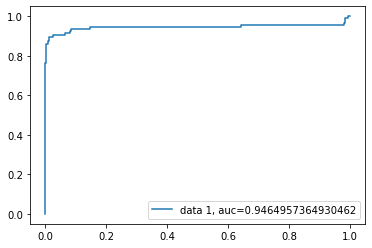

In [25]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Conclusion
The AUC Score is 94.6%. Our predictions are not predicting the fraud transactions because it is an imbalanced dataset. 

We would apply following methods.
1. Oversample minority class (i.e. fradulent transactions)
2. Ensemble modelling (Random Forrest)
3. Bagging
4. Boosting (XGBoost)

### Oversampling

In [ ]:
!pip install scikit-learn==0.18.2 

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [6]:
X= X_org
Y= y_org
X_res,Y_res = sm.fit_resample(X,Y)
#Split the train and test model in 80:20 ratio 
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.2,random_state=1)

NameError: name 'sm' is not defined

### Fitting the model on train data.

In [28]:
model = LogisticRegression()
model = model.fit(X_train,Y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model.score(X_train,Y_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model.score(X_test,Y_test))

Accuracy of the training set 0.9616345305711954
Accuracy of the testing set 0.960969872830591


In [30]:
#Predict the class labels for training set
predict = model.predict(X_train)
#Confusion Matrix for training set 
print("Confusion Matrix for training set:")
print(confusion_matrix(predict,Y_train))

#Predict the class labels for testing set
predict_test = model.predict(X_test)
#Confusion Matrix for training set 
print("Confusion Matrix for testing set:")
print(confusion_matrix(predict_test,Y_test))

print(classification_report(predict_test, Y_test))

Confusion Matrix for training set:
[[179141  11065]
 [  2897 170818]]
Confusion Matrix for testing set:
[[44695  2833]
 [  718 42735]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     47528
           1       0.94      0.98      0.96     43453

    accuracy                           0.96     90981
   macro avg       0.96      0.96      0.96     90981
weighted avg       0.96      0.96      0.96     90981



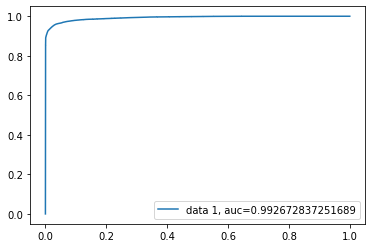

In [31]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### AUC Curve :99% which is very high. Along with it our F1-score, precison and recall scores are also high (96%, 98% and 94% respectively).

### Naive Bayes

In [9]:
X= X_org
Y= y_org

#Split the train and test model in 80:20 ratio 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

NameError: name 'X_org' is not defined

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [31]:
#Scale the features
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [35]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model.score(X_train,Y_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model.score(X_test,Y_test))

Accuracy of the training set 0.977621848186267
Accuracy of the testing set 0.9782966490377231


In [34]:
#Predict the class labels for training set
predict = model.predict(X_train)
#Confusion Matrix for training set 
print("Confusion Matrix for training set:")
print(confusion_matrix(predict,Y_train))

#Predict the class labels for testing set
predict_test = model.predict(X_test)
#Confusion Matrix for training set 
print("Confusion Matrix for testing set:")
print(confusion_matrix(predict_test,Y_test))

print(classification_report(predict_test, Y_test))

Confusion Matrix for training set:
[[177947     50]
 [  4029    250]]
Confusion Matrix for testing set:
[[44502    16]
 [  973    78]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44518
           1       0.83      0.07      0.14      1051

    accuracy                           0.98     45569
   macro avg       0.90      0.54      0.56     45569
weighted avg       0.98      0.98      0.97     45569



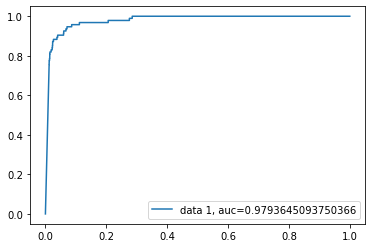

In [36]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
### AUC Curve :97.9%. Our F1-score, precison and recall scores are also very low. (14%, 83% and 7% respectively).

### Random Forest Classifier

In [9]:
X= X_org
Y= y_org
#Split the train and test model in 80:20 ratio 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
model_rf = rf.fit(X_train,Y_train)

In [12]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model_rf.score(X_train,Y_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model_rf.score(X_test,Y_test))

Accuracy of the training set 0.9999945138142158
Accuracy of the testing set 0.9994733261647173


In [10]:
#Predict the class labels for training set
predict = model_rf.predict(X_train)
#Confusion Matrix for training set 
print("Confusion Matrix for training set:")
print(confusion_matrix(predict,Y_train))

#Predict the class labels for testing set
predict_test = model_rf.predict(X_test)
#Confusion Matrix for training set 
print("Confusion Matrix for testing set:")
print(confusion_matrix(predict_test,Y_test))

print(classification_report(predict_test, Y_test))

Confusion Matrix for training set:
[[181976      1]
 [     0    299]]
Confusion Matrix for testing set:
[[45472    21]
 [    3    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45493
           1       0.78      0.96      0.86        76

    accuracy                           1.00     45569
   macro avg       0.89      0.98      0.93     45569
weighted avg       1.00      1.00      1.00     45569



In [ ]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model.score(X_train,Y_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model.score(X_test,Y_test))

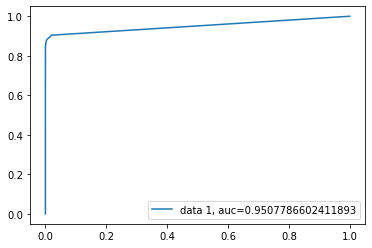

In [14]:
from sklearn import metrics
y_pred_proba = model_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### AUC Curve :99% which is very high. Along with it our F1-score, precison and recall scores arealso high (94%, 98% and 96% respectively).

### Bagging: DecisionTree Classifier 

In [7]:
X= X_org
Y= y_org
#Split the train and test model in 80:20 ratio 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [8]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10,random_state=seed)
num_trees=100
model = BaggingClassifier(LogisticRegression())
model.fit(X_train, Y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incre

BaggingClassifier(base_estimator=LogisticRegression())

In [9]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model.score(X_train,Y_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model.score(X_test,Y_test))

Accuracy of the training set 0.9992264478044285
Accuracy of the testing set 0.999100265531392


In [10]:
#Predict the class labels for training set
predict = model.predict(X_train)
#Confusion Matrix for training set 
print("Confusion Matrix for training set:")
print(confusion_matrix(predict,Y_train))

#Predict the class labels for testing set
predict_test = model.predict(X_test)
#Confusion Matrix for training set 
print("Confusion Matrix for testing set:")
print(confusion_matrix(predict_test,Y_test))

print(classification_report(predict_test, Y_test))

Confusion Matrix for training set:
[[181946    111]
 [    30    189]]
Confusion Matrix for testing set:
[[45468    34]
 [    7    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45502
           1       0.64      0.90      0.75        67

    accuracy                           1.00     45569
   macro avg       0.82      0.95      0.87     45569
weighted avg       1.00      1.00      1.00     45569



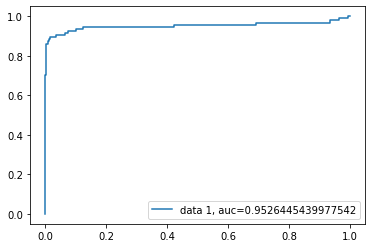

In [11]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
X= X_org
Y= y_org
#Split the train and test model in 80:20 ratio 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [13]:
from xgboost import XGBClassifier
model = XGBClassifier(objective="reg:logistic")
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

C:\Users\Ravi\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Ravi\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Ravi\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [16]:
#Checking the accuracy of the training set
print("Accuracy of the training set",model.score(X_train,Y_train))
#Checking the accuracy of the testing set
print("Accuracy of the testing set",model.score(X_test,Y_test))

Accuracy of the training set 1.0
Accuracy of the testing set 0.9994733261647173


In [17]:
#Predict the class labels for training set
predict = model.predict(X_train)
#Confusion Matrix for training set 
print("Confusion Matrix for training set:")
print(confusion_matrix(predict,Y_train))

#Predict the class labels for testing set
predict_test = model.predict(X_test)
#Confusion Matrix for training set 
print("Confusion Matrix for testing set:")
print(confusion_matrix(predict_test,Y_test))

print(classification_report(predict_test, Y_test))

Confusion Matrix for training set:
[[181976      0]
 [     0    300]]
Confusion Matrix for testing set:
[[45471    20]
 [    4    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45491
           1       0.79      0.95      0.86        78

    accuracy                           1.00     45569
   macro avg       0.89      0.97      0.93     45569
weighted avg       1.00      1.00      1.00     45569



### Conclusion: For fradulent transactions, precision is 79%, recall is 95 % and F1-score of 86% only.

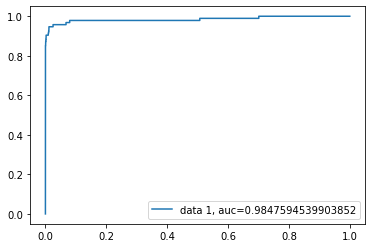

In [23]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGBClassifier is the best classifier. We get a high AUC score of 98.47%.